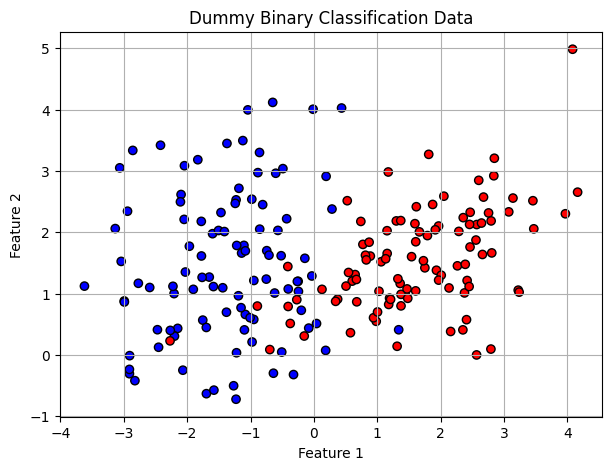

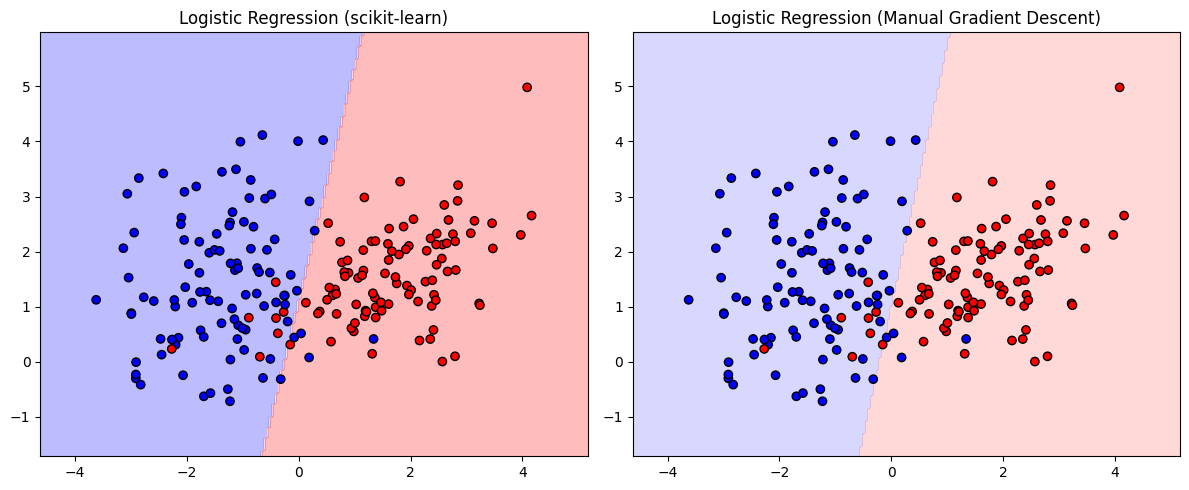

In [1]:
# ---------------------------------------------------------
# IMPORTS
# ---------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


# ---------------------------------------------------------
# GENERATE RANDOM BINARY CLASSIFICATION DATA
# ---------------------------------------------------------
X, y = make_classification(
    n_samples=200,          # total points
    n_features=2,           # two input features
    n_redundant=0,          # no unnecessary features
    n_informative=2,        # both features useful
    n_clusters_per_class=1, # one cluster per class
    class_sep=1.5,          # distance between classes
    random_state=42         # reproducibility
)


# ---------------------------------------------------------
# PLOT GENERATED DATA
# ---------------------------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Dummy Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


# ---------------------------------------------------------
# LOGISTIC REGRESSION USING SKLEARN
# ---------------------------------------------------------
model = LogisticRegression()
model.fit(X, y)  # train model


# ---------------------------------------------------------
# MANUAL LOGISTIC REGRESSION - PREPARE BIAS TERM
# ---------------------------------------------------------
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term → [1, x1, x2]


# ---------------------------------------------------------
# SIGMOID FUNCTION
# ---------------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# ---------------------------------------------------------
# COST FUNCTION (LOG LOSS)
# ---------------------------------------------------------
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return -(1/m) * (y @ np.log(h + 1e-5) + (1 - y) @ np.log(1 - h + 1e-5))


# ---------------------------------------------------------
# GRADIENT DESCENT IMPLEMENTATION
# ---------------------------------------------------------
def gradient_descent(X, y, alpha=0.1, epochs=1000):
    theta = np.zeros(X.shape[1])  # initialize theta = [0, 0, 0]
    cost_history = []

    for _ in range(epochs):
        h = sigmoid(X @ theta)               # forward pass
        gradient = X.T @ (h - y) / y.size    # compute gradient
        theta -= alpha * gradient            # update parameters
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


# ---------------------------------------------------------
# TRAIN MANUAL GRADIENT DESCENT MODEL
# ---------------------------------------------------------
theta_gd, cost_history = gradient_descent(X_b, y)


# ---------------------------------------------------------
# CREATE MESHGRID FOR DECISION BOUNDARY PLOTS
# ---------------------------------------------------------
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
)


# ---------------------------------------------------------
# DECISION BOUNDARY — SKLEARN MODEL
# ---------------------------------------------------------
Z_sklearn = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)


# ---------------------------------------------------------
# DECISION BOUNDARY — MANUAL GD MODEL
# ---------------------------------------------------------
grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]  # add bias
Z_manual = sigmoid(grid @ theta_gd) >= 0.5                   # classify
Z_manual = Z_manual.reshape(xx.shape)


# ---------------------------------------------------------
# PLOT BOTH MODELS
# ---------------------------------------------------------
plt.figure(figsize=(12, 5))

# --- sklearn ---
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_sklearn, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Logistic Regression (scikit-learn)")

# --- manual GD ---
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_manual, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Logistic Regression (Manual Gradient Descent)")

plt.tight_layout()
plt.show()
